# 2023 Summer Python Workshop

This notebook follows a 1 hour tutorial/lecture covering some of the basics of Python. By this point in the workshop, you will have created a working environment with the necessary packages, and will be ready to import the ones you expect to use. This can be done in any cell in the notebook, but is best done at the top to keep track. The notebook will cover how to create and manipulate arrays, how to use python's object-oriented class structures, and some advice on how to make sure your code stays reasonably performant.

Most work in python starts with importing packages written by others or yourself. It can be useful to import commonly used packages with shortened names:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

If you try to import a package and get a `ModuleNotFoundError: No module named '<package name>'` output, you will have to go to your command line and install the package to your working environment with either `conda install <package name>` or `pip install <package name>`. In this case, it's possible you don't have pandas installed. **You won't need it for this exercise**, but for future reference you may want to `conda install pandas`. 

If you only want one function from a package, you can specify that at import:

In [3]:
from math import sqrt
print(sqrt(9))

3.0


or you can import a package and specify the package each time you use a function from it: 

In [4]:
import math
print(math.sqrt(9))

3.0


# Working with Arrays
From images (values distributed over space) to time series (values distributed over time) to spectra (values distributed over wavelength) to combinations of the above and much more, the Array (sometimes called a Tensor) is the fundamental datatype of most physical programming.

Arrays are sets of numbers of a given shape and dimension. The dimension is the number of axes, and the shape is a tuple representing the size of each.

Let's make some arrays that we can work with.

## Populating Arrays

This can be done in a few ways. 

In [4]:
#manually defining a 1d array
myarray = np.array([1, 2, 3])
print(myarray)

#manually defining a 2d array 
my2darray = np.array([[1,2,3],[4,5,6]])
print(my2darray)

#generating numbers between -5 and 5 with spacing 1
x_data_arange = np.arange(-5, 6, 1)
print(x_data_arange)

#generating 51 numbers evenly spaced between 1-100
x_data_linspace = np.linspace(0, 100, 51)
print(x_data_linspace)

[1 2 3]
[[1 2 3]
 [4 5 6]]
[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.]


## Indexing

We can use our linspace array to show some easy ways to find the value of a particular element in your array. 

In [21]:
print(x_data_linspace)

#getting the first entry
first_entry = x_data_linspace[0]
print(first_entry)
print()

#getting the last entry
last_entry = x_data_linspace[-1]
print(last_entry)
print()

#getting the 10th entry (remember that python indexes from zero!)
tenth_entry = x_data_linspace[9]
print(tenth_entry)
print()

#getting every even index values
print(x_data_linspace[::2])

#...and every odd
print(x_data_linspace[1::2])

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.]
0.0

100.0

18.0

[  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]
[ 2.  6. 10. 14. 18. 22. 26. 30. 34. 38. 42. 46. 50. 54. 58. 62. 66. 70.
 74. 78. 82. 86. 90. 94. 98.]


## Simple Operations

In the sections below, you will see more benefits of using numpy arrays instead of other object types, like lists. One example of this is that you can much more easily do basic operations on an entire numpy array. 

In [18]:
example_list = [0,1,2,3,4]
print(type(example_list))
print(example_list)
print(example_list + 1)

<class 'list'>
[0, 1, 2, 3, 4]


TypeError: can only concatenate list (not "int") to list

You'll get a `TypeError` if you try to add 1 to your list of numbers. However, if you try to do the same to a numpy array:

In [19]:
example_array = np.array([0,1,2,3,4])
print(type(example_array))
print(example_array)
print(example_array + 1)

<class 'numpy.ndarray'>
[0 1 2 3 4]
[1 2 3 4 5]


The operation is applied to each element of the array.

Numpy is also useful for a lot of simple math functions and constants:

In [17]:
print(np.sin(np.pi/2.))

1.0


## Visualizing with Matplotlib

Matplotlib is a very powerful plotting tool with many capabilities, which we will hardly scratch the surface of today. Hopefully this workshop will be useful as a jumping off point. 
Here is a simple example of a few ways you can customize your visualizations, first using what we already know to make some "data" to plot. You will see more about plotting 2d arrays in the Slicing section below, but for now we will stick to a simple sinusoid.

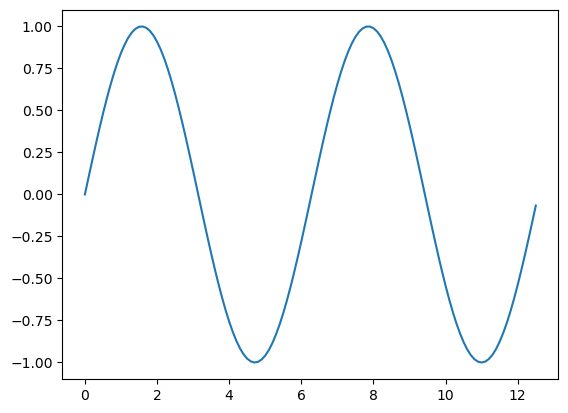

In [49]:
x_data = np.arange(0,4*np.pi,0.1)
y_data = np.sin(x_data)

# at the most bare-bones, you will need an x and a y array that are the same length.
plt.plot(x_data, y_data)

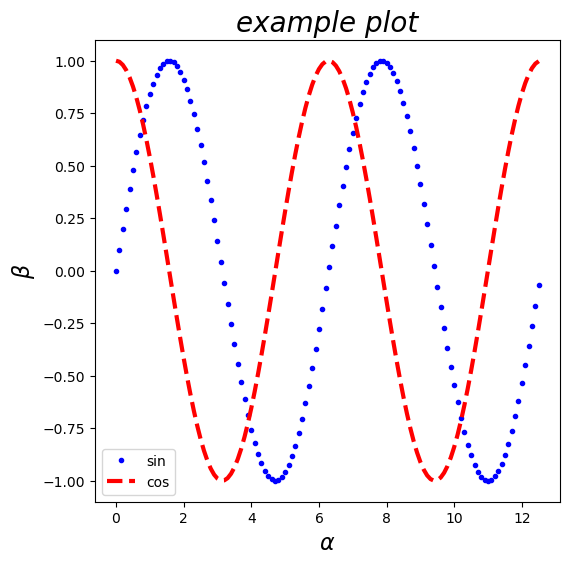

In [50]:
# That looks a little boring, and we may also want to initialize our plot as an object with a name,
# incase we need to save it. In doing so, we can customize it more.

fig = plt.figure(figsize=(6, 6)) #initialize and set the size of the figure.

#customize the attributes of the plot, and set a label incase we want a legend.
plt.plot(x_data, y_data, linestyle='none', marker='o', markersize=3, color='b', label='sin')

#add another line with different attributes
plt.plot(x_data, np.cos(x_data), linestyle='--', linewidth=3, color='r', label='cos')

#create axis labels, using latex formatting for special characters
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)

#create a title
plt.title('example plot', fontsize=20, style='oblique')

#create a legend, and specify where to show it in the plot.
plt.legend(loc='lower left', frameon=True) #'loc' moves the legend around, frameon puts a box around the legend

#save your plot to your working directory
fig.savefig('example_plot.jpg')

plt.show()

## Conditions

You can locate parts of your array which meet certain conditions using the `np.where` function. Here is a simple example:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),)
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691 0.84147098 0.89120736
 0.93203909 0.96355819 0.98544973 0.99749499 0.9995736  0.99166481
 0.97384763 0.94630009 0.90929743 0.86320937 0.8084964  0.74570521
 0.67546318 0.59847214 0.51550137 0.42737988 0.33498815 0.23924933
 0.14112001 0.04158066 0.0168139  0.1165492  0.21511999 0.31154136
 0.40484992 0.49411335 0.57843976 0.6569866  0.72896904 0.79366786
 0.85043662 0.8987081  0.93799998 0.96791967 0.98816823 0.99854335
 0.99894134 0.98935825 0.96988981 0.94073056 0.90217183 0.85459891
 0.79848711 0.7343971  0.66296923 0.58491719 0.50102086 0.41211849
 0.31909836 0.22288991 0.12445442 0.024775

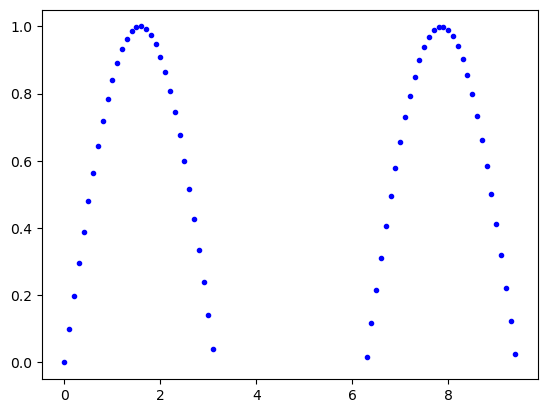

In [51]:
#locate the indices at which your array "y_data" are positive.
where_pos = np.where(y_data >= 0)
print(where_pos)

#to print just the values of y_data which meet the condition, use this syntax:
y_data_pos = y_data[where_pos]
print(y_data_pos)

#if you want to plot just the positive values, you will have to capture those same indices of your x vector:
x_data_pos = x_data[where_pos]

#visualize
plt.plot(x_data_pos, y_data_pos, linestyle='none', marker='o', markersize=3, color='b', label='sin')

## ... back to visualizing

`np.where` is a valuable function for isolating certain parts of your data. However, if all you want to do is 'zoom in' on a certain part of your plotted data, that can be done without manipulating the data arrays themselves.

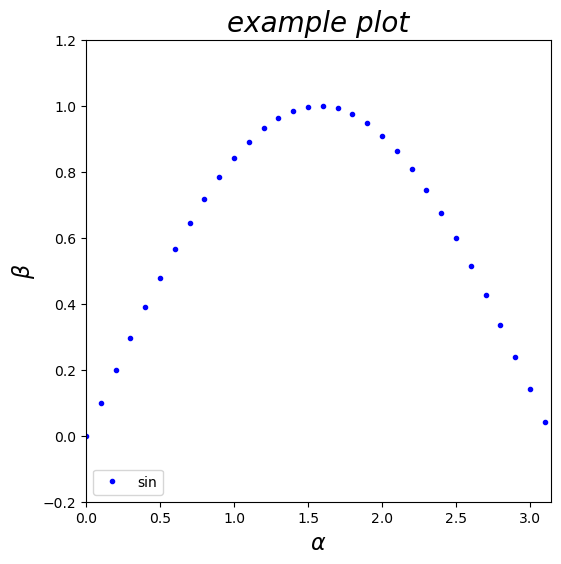

In [52]:
fig = plt.figure(figsize=(6, 6)) #initialize and set the size of the figure.

plt.plot(x_data, y_data, linestyle='none', marker='o', markersize=3, color='b', label='sin')

plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)

plt.title('example plot', fontsize=20, style='oblique')

plt.legend(loc='lower left', frameon=True)

#specify the limits of the displayed axes
plt.xlim([0, np.pi])
plt.ylim([-0.2,1.2])

plt.show()

If you want to establish a consistent "visual style" within a notebook, there are ways to change the default styles used by matplotlib, so that you don't have to make the changes within each cell. We won't have time during this workshop, but I encourage you to explore this more: https://matplotlib.org/3.5.0/tutorials/introductory/customizing.html

## Modifying and Displaying Array "Slices"

Sometimes, you only want to deal with a certain part of an array. Perhaps it's an image of a field of stars, and you want to make a new array that only contains one of the stars.

Let's start by creating some empty space.

In [6]:
# np.zeros creates an array of zeros of a specified shape
# it's a great tool for allocating a blank sheet of memory to play with!
canvas = np.zeros((20,20))
print(canvas)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

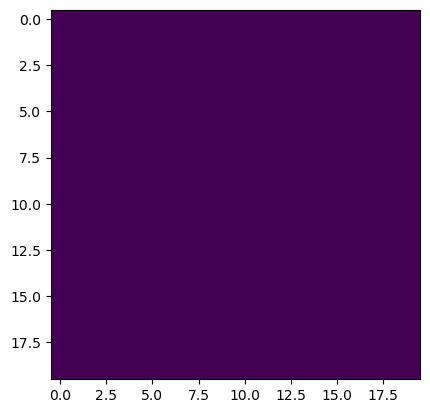

In [7]:
# We can also plot it as an image
plt.imshow(canvas)

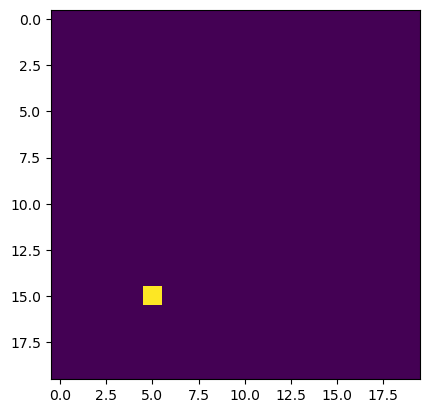

In [8]:
# Now we can change specific pixel values like this
canvas[15][5] = 10

plt.imshow(canvas)

The first number is the y-coordinate, and the second is x!

The origin is in the upper left!

This is because a 2D array is a vertical array of of horizontal 1D arrays. The first number selects which index of the parent array of arrays you want to edit, and the second selects the index of that array.

You can see this easily when you look at the printed output


In [9]:
print(canvas)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

Next, let's try modifying values, instead of just setting them.

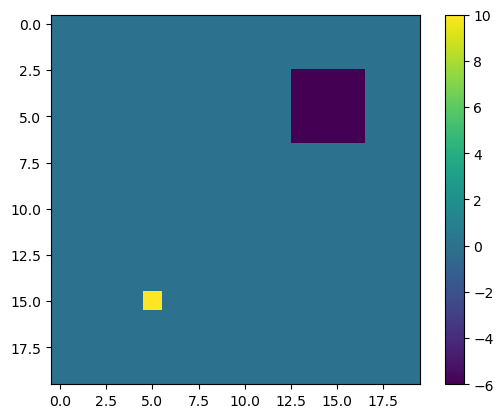

In [10]:
# adjacent square brackets can be combined with a comma
# ranges of values can be specified with a colon
# operations can be done efficiently using "python assignment operators"
# in this case, '-=' subtracts 6 from the slice canvas[3:7,13:17], and assigns the result to canvas.
canvas[3:7,13:17] -= 6
# This is a "slice" of an array!

plt.imshow(canvas)
# and let's add a colorbar as things get busy
plt.colorbar()

We have modified a subset, or "slice" of the array.

The notation used (commas and colons) is called "slicing" an array. An array "slice" is NOT its own object. It is a pointer to the specified addresses. This persists even if the slice is given its own variable.

### NOTE

Mathematically, subtracting a number from an array makes intuitive sense, but on a computer science level this is a little odd.

These operations add together two very different objects. One is two dimensional, the other is zero dimensional. Python accomplishes this by *broadcasting*. It takes a lower-dimensional object and copies it along each new axis until it is the same size as the higher-dimensional object. We'll talk more about this later. For now, I'll drop a link to the manual about how this happens: https://numpy.org/doc/stable/user/basics.broadcasting.html

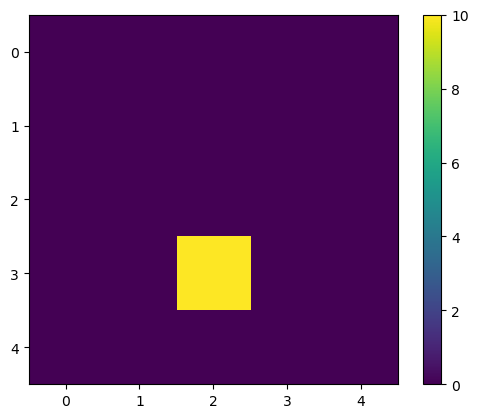

In [11]:
# Let's make a variable that's a slice of our canvas
subcanvas = canvas[12:17,3:8]

plt.imshow(subcanvas)
plt.colorbar()
# note the change in axes. we are now only looking at the 'subcanvas' slice of 'canvas'.

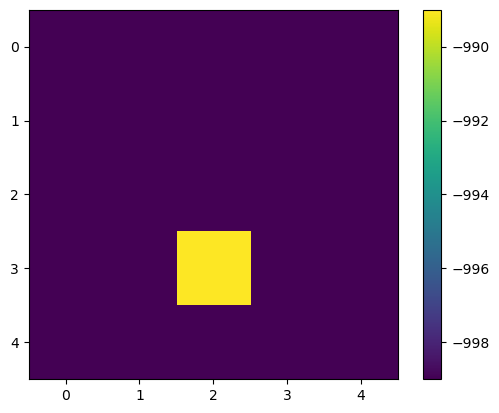

In [12]:
# Now, let's change the value, and see what happens
subcanvas -= 999

plt.imshow(subcanvas)
plt.colorbar()

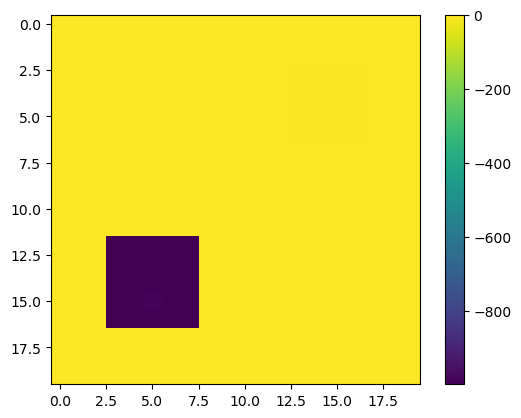

In [13]:
# But wait, that changed the main canvas too!

plt.imshow(canvas)
plt.colorbar()

To reiterate, a slice is NOT its own object, it is a collection of pointers to values in the parent.  If you want to make a slice that you can edit freely without modifying the original data, make a copy!

In [14]:
# Making a copy using numpy ndarray's built-in copy method (specific to this object)
subcanvas = canvas[12:17,3:8].copy()
# Making a copy using numpy's general copy function (can find a way to copy most objects)
subcanvas = np.copy(canvas[12:17,3:8])

# Objects

Objects (classes) are useful because they allow you to package many different functions and other objects into a single object

In [15]:
class Gaussian2d:
    def __init__(self, axis_one=None, axis_two=None):
        """Initialize the Gaussian2d object
        
        self allows an instance of the class to remember information

        empty axis_stats dict
        both axes set to None
        """
        
        self.axis_stats = {}
        self.axis_one = axis_one
        self.axis_two = axis_two
        
    # a function in a class is called a method
    # np.linspace() is a method of the numpy object
    # some methods take arguments and some do not
    def add_axis(self, axis:int, start:float, stop:float, num:int):
        """Add axis to the Gaussian2d object
        
        start is one edge of the axis
        stop is the other edge
        num is the number of equally-spaced values along the axis
        """
        if axis == 0:
            self.axis_one = np.linspace(start=start, stop=stop, num=num)
        if axis == 1:
            self.axis_two = np.linspace(start=start, stop=stop, num=num)
            
    def gauss(self, amp:float, mean:list, stdv:list):
        """Make a gaussian 2darray
        
        amp is the amplitude of the gaussian
        mean is a list of the means of the gaussian along each axis
        stdv is a list of the standard deviations along each axis
        """
        if type(self.axis_one) == None or type(self.axis_two) == None:
            print("Need to have both axes defined")
        else:
            mesh_one, mesh_two = np.meshgrid(self.axis_one, self.axis_two)
            self.gaussian = amp * np.exp(-((mesh_one - mean[0])**2. / (2. * stdv[0]**2.) + (mesh_two - mean[1])**2. / (2. * stdv[1]**2.)))
        
    def add_noise(self, stdv:float):
        """Make a gaussian with white noise added
        
        stdv is the standard deviation of the white noise
        """
        self.noisy_gaussian = self.gaussian + np.random.normal(loc=0, scale=stdv, size=self.gaussian.shape)
        
class Plot:
    def __init__(self, data:Gaussian2d):
        """Initialize the Plot object
        
        transfer attributes from Gaussian2d to Plot object
        """
        self.gauss = data.gaussian
        self.noise = data.noisy_gaussian
        self.axis_one = data.axis_one
        self.axis_two = data.axis_two
        
    def plot_gauss(self):
        """Start a matplotlib.pyplot object
        
        pcolormesh to include axes automatically
        allows you to add additional aspects to the plot
        """
        plt.pcolormesh(self.axis_one, self.axis_two, self.gauss)
        plt.colorbar()
        
    def plot_noise(self):
        """Start a matplotlib.pyplot object
        
        pcolormesh to include axes automatically
        allows you to add additional aspects to the plot
        """
        plt.pcolormesh(self.axis_one, self.axis_two, self.noise)
        plt.colorbar()

# it will often be useful to wrap up code into a wrapper class       
class Wrapper:
    def __init__(self, axis_one, axis_two, params):

        self.gaussian = Gaussian2d(axis_one=axis_one, axis_two=axis_two)
        
        # using *params fills a function argument with the elements of params
        self.gaussian.gauss(*params)

        self.gaussian.add_noise(1)
        
        self.plot = Plot(self.gaussian)
        
        self.plot.plot_noise()

In [16]:
# start be begining an empty instance of the Gaussian2d object
G = Gaussian2d()

# because we did not include values for axis_one or axis_two, the corresponding attributes of G are the None type
# let us use the .add_axis method to add the axes

G.add_axis(0, -10,10,100)
G.add_axis(1,-10,10,100)

# now lets see what we get when calling the axis_one attribute
print(G.axis_one)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [17]:
# we can replace the attribute set using a method with an external array
G.axis_one = np.linspace(0,5,100)
G.axis_two = np.linspace(0,5,70)

# check that this has changed the attributes

print(G.axis_one)

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

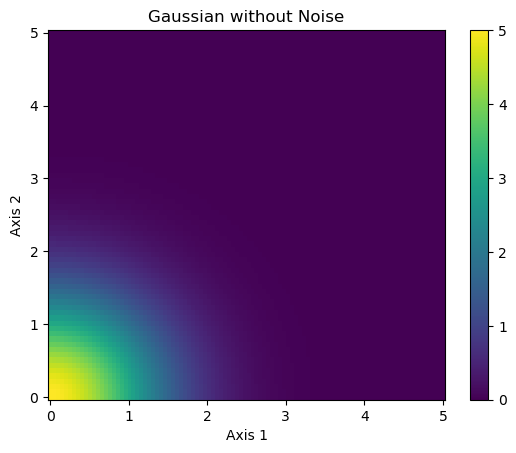

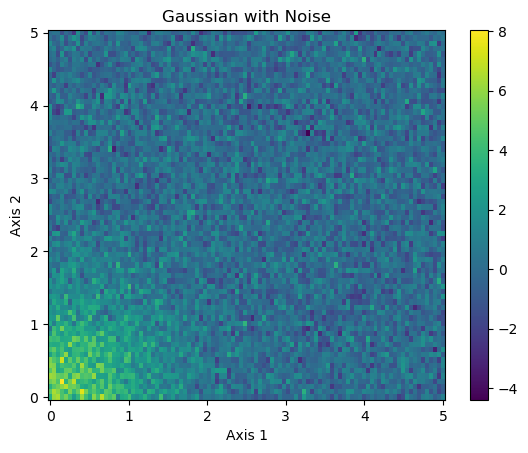

In [19]:
# some methods change or add attributes of the class instance
# be careful when using these methods as they will permanently change your instance
G.gauss(amp=5,mean=[0,0],stdv=[1,1])
G.add_noise(1)

P = Plot(G)

# call the plotting methods of the P instance of Plot
P.plot_gauss()

# we can add on additional aspects to the plt object before using plt.show()
plt.title('Gaussian without Noise')
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.show()

P.plot_noise()
plt.title('Gaussian with Noise')
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')
plt.show()

# For loops and performance

Python is slow, especially when looping through large datasets, and especially especially when doing nested loops through big arrays. C is faster than python, [about two orders of magnitude faster by some metrics](https://github.com/niklas-heer/speed-comparison). Numpy functions are written in C. Any time you can offload a for loop into a numpy function (usually a broadcast), you can greatly speed up your code.

In [20]:
# not really all that big, but big enough to see the effect
bigarray = np.ones((1000,1000))
import time

In [21]:
start = time.time()
for i in range(len(bigarray)):
    for j in range(len(bigarray[0])):
        bigarray[i][j] + bigarray[j][i]

print("for loops time: " + str(time.time()-start))
# On my computer this took 0.643669843673706 seconds

for loops time: 0.6428792476654053


In [22]:
start = time.time()
bigarray + bigarray.transpose()
print("with array transformation in C: " + str(time.time()-start))
# On my computer this took 0.005024433135986328 seconds

with array transformation in C: 0.005465269088745117


You can easily see how this can really start to add up if you are doing more complex operations within the for loop, and/or operating on datasets that are actually really big.

If your code is having performance problems, or if you just want to avoid them, a good rule of thumb is to offload as many for loops into C as possible. Sometimes this involves getting creative with array transformations and mathematical relationships.

If you are having performance issues and aren't sure how to remove some of your for loops, this manual is your best friend: https://numpy.org/doc/stable/user/basics.broadcasting.html

# Assignment

Your assignment is to create a class in a separate .py file, and import it into a jupyter notebook.

### Class requirements

For this assignment, the goal is to create a class that has the following properties:

1. It contains an array containing some sort of generated data.
2. It contains a method for manipulating/modifying that array.

Requirements subject to change and negotiation based on how much time we have left.

# Extra: Dictionaries

Dictionaries are sets of key-value pairs. They are most commonly found as "labels" or "headers" describing an image.

In python, dictionaries are denoted by curly braces {}.

In [26]:
# Creating an empty dictionary
mydict = {}

# adding some key-value pairs
mydict["data"]=np.indices((3,4))
mydict["name"]="Array of index values for a 3x4 array"
mydict["mean"]=np.mean(mydict["data"])

print(mydict)

{'data': array([[[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2]],

       [[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]]), 'name': 'Array of index values for a 3x4 array', 'mean': 1.25}


Dictionaries are a great way to store metadata, tags, and other identifying information.

Often, they contain information about when an observation was taken, the direction the spacecraft was pointed in, the pole vector of the target, the integration time of the image, or anything else that might be useful or important for the data analysis.

They pair very well with objects to store information about what is in an object and what has been done to it.